## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Harry Atulah
# Full time
#
#MaryAnne Mwikali
#


### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading datasets tmdb.movies

In [3]:
df = pd.read_csv('zippedData/tmdb.movies.csv', index_col = 0)
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
df.dtypes

genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

### Data cleaning and Analyzing

In [5]:
df.shape

(26517, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [7]:
df.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [8]:
df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [9]:
df.duplicated('original_title').sum()

1682

### tn.movie_budgets

In [10]:
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv', index_col = 0)
tn_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
tn_df.shape

(5782, 5)

In [12]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [13]:
tn_df.describe()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",Home,"$20,000,000",$0,$0
freq,24,3,231,548,367


In [14]:
tn_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [15]:
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace('$', '')  # Remove dollar sign
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace(',', '')  # Remove commas
tn_df['domestic_gross'] = pd.to_numeric(tn_df['domestic_gross'])

In [16]:
tn_df['production_budget'] = tn_df['production_budget'].str.replace('$', '')  # Remove dollar sign
tn_df['production_budget'] = tn_df['production_budget'].str.replace(',', '')  # Remove commas
tn_df['production_budget'] = pd.to_numeric(tn_df['production_budget'])

In [17]:
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace('$', '')  # Remove dollar sign
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',', '')  # Remove commas
tn_df['worldwide_gross'] = pd.to_numeric(tn_df['worldwide_gross'])

In [18]:
tn_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


### rt.movie_info

In [19]:
rt_df = pd.read_csv('zippedData/rt.movie_info.tsv', sep='\t', encoding='latin1', index_col = 0)
rt_df.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [20]:
rt_df.dtypes

synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office      object
runtime         object
studio          object
dtype: object

In [21]:
rt_df.shape

(1560, 11)

In [22]:
rt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


In [23]:
rt_df.describe()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
count,1498,1557,1552,1361,1111,1201,1201,340,340,1530,494
unique,1497,6,299,1125,1069,1025,717,1,336,142,200
top,A group of air crash survivors are stranded in...,R,Drama,Steven Spielberg,Woody Allen,"Jan 1, 1987","Jun 1, 2004",$,"600,000",90 minutes,Universal Pictures
freq,2,521,151,10,4,8,11,340,2,72,35


In [24]:
rt_df.isna().sum()

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [25]:
rt_df.dropna(inplace=True)

In [26]:
rt_df.shape

(235, 11)

In [27]:
rt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 3 to 1985
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      235 non-null    object
 1   rating        235 non-null    object
 2   genre         235 non-null    object
 3   director      235 non-null    object
 4   writer        235 non-null    object
 5   theater_date  235 non-null    object
 6   dvd_date      235 non-null    object
 7   currency      235 non-null    object
 8   box_office    235 non-null    object
 9   runtime       235 non-null    object
 10  studio        235 non-null    object
dtypes: object(11)
memory usage: 22.0+ KB


# Data Visualization

### tmdb.movies

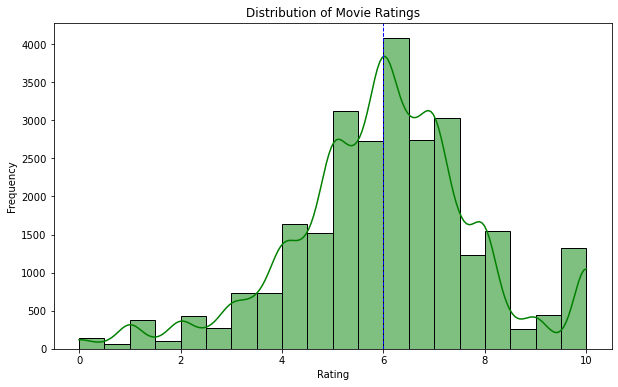

In [28]:
#Histogram
# Plotting distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='vote_average', bins=20, kde=True, color='green')
plt.axvline(df['vote_average'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The distribution of movie ratings within the dataset serves as a crucial tool for Microsoft's new movie studio as it embarks on entering the film industry. By analyzing this distribution, Microsoft gains insights into audience expectations and perceptions of film quality, essential for aligning their content with viewer preferences. Moreover, it allows them to benchmark their movies against industry standards, aiding in decision-making processes and strategic planning. By discerning trends within the distribution, Microsoft can tailor their productions to target specific audiences and genres, maximizing the potential for commercial success in a competitive market landscape.

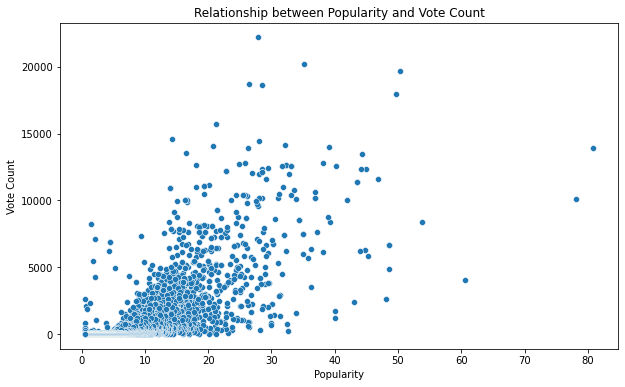

In [29]:
#Scatter plot
# Plotting relationship between popularity and vote count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='popularity', y='vote_count')
plt.title('Relationship between Popularity and Vote Count')
plt.xlabel('Popularity')
plt.ylabel('Vote Count')
plt.show()

The scatter plot illustrating the correlation between a movie's popularity and its vote count serves as a critical tool for Microsoft's new movie studio entering the film industry. It provides insights into audience engagement levels, helping Microsoft understand the interest and interaction among viewers, essential for creating resonant content. By establishing performance metrics and monitoring the feedback loop generated by the plot over time, Microsoft can evaluate movie reception and make informed decisions about marketing strategies and content creation. Additionally, the plot facilitates competitive analysis, enabling Microsoft to gauge its movies' performance against competitors and identify areas for improvement to stay competitive in the market

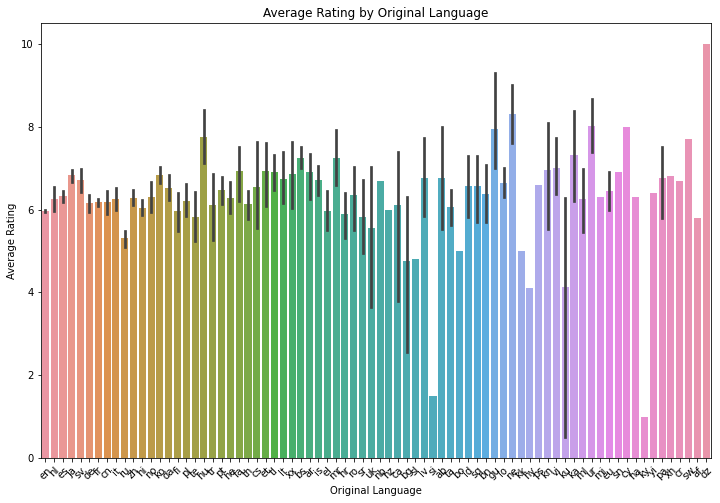

In [30]:
# Bar Graph
# Plotting average rating by original language
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='original_language', y='vote_average')
plt.title('Average Rating by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

The bar plot depicting average movie ratings by original language offers Microsoft crucial insights for establishing their new movie studio. It enables them to discern audience language preferences, aiding in resource allocation and content strategy alignment. Additionally, the plot facilitates market segmentation by identifying languages with higher ratings, allowing targeted marketing efforts. Microsoft can gauge movie quality across languages, guiding their own production standards and localization strategies for global expansion. Moreover, the data assists in content acquisition decisions, directing Microsoft towards acquiring high-quality movies that resonate with diverse audiences, thus positioning their studio for success in the competitive film industry.

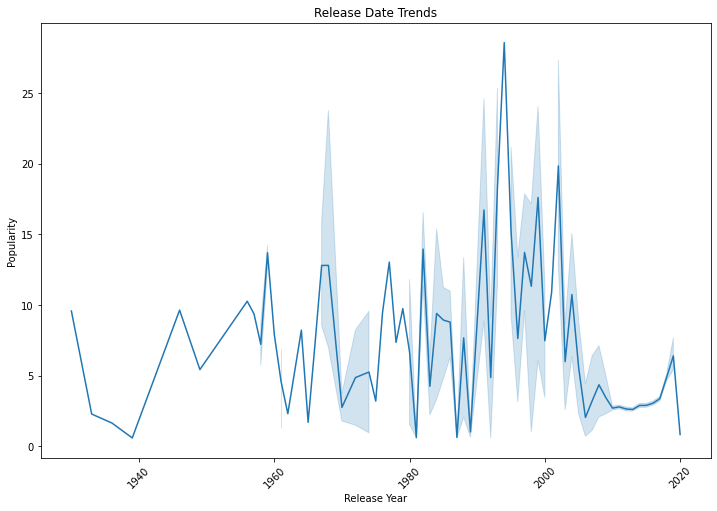

In [31]:
#Line graph
# Converting release_date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Extracting year from release_date
df['release_year'] = df['release_date'].dt.year

# Plotting release date trends
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='release_year', y='popularity')
plt.title('Release Date Trends')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()

The line plot depicting trends in movie popularity over time offers Microsoft invaluable insights crucial for establishing their new movie studio. Through analysis of audience preferences and release timing optimization, Microsoft can align their content strategy with current trends and strategically schedule movie releases for maximum impact. Additionally, the plot aids in content strategy planning by identifying emerging genres and storytelling approaches, while also facilitating competitive analysis against industry trends to refine strategies and enhance market positioning. Furthermore, the long-term perspective provided by the plot allows Microsoft to anticipate future shifts in audience tastes and adapt their strategies accordingly, ensuring long-term success in the dynamic film industry landscape.

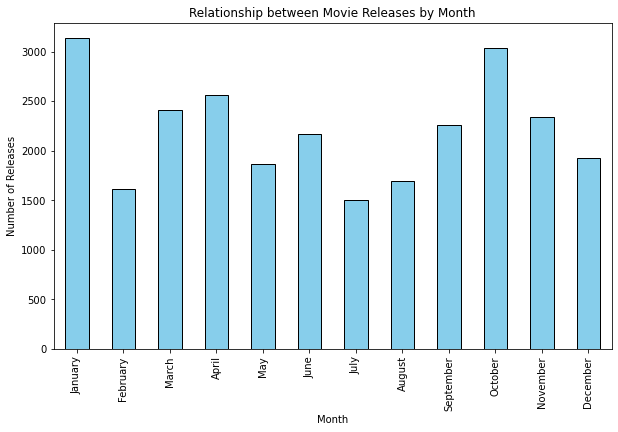

In [32]:
# Convert 'release_date' column to datetime

df['release_date'] = pd.to_datetime(df['release_date'])
monthly_release_count = df['release_date'].dt.month_name().value_counts()

# Sort the months
monthly_release_count = monthly_release_count.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plot the graph

plt.figure(figsize=(10, 6))
monthly_release_count.plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Relationship between Movie Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.show()

The bar graph shows the distribution of movie releases by month which offers actionable insights for Microsoft's new movie studio, informing their release timing strategy, seasonal planning, competitive analysis and long term business planning. From the graph we can advice Microsoft to release majority of movies on January and October

## tn.movie_budgets

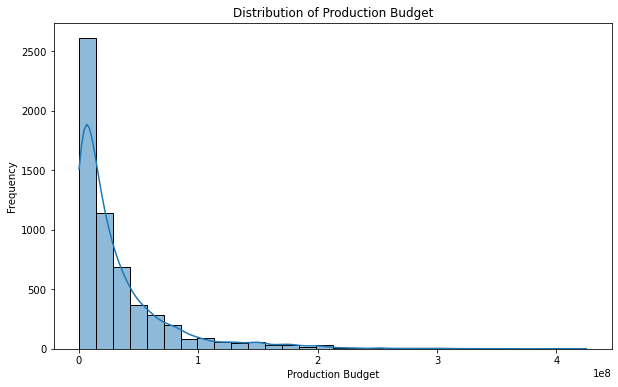

In [33]:
#Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=tn_df, x='production_budget', bins=30, kde=True)
plt.title('Distribution of Production Budget')
plt.xlabel('Production Budget')
plt.ylabel('Frequency')
plt.show()


This histogram displays the distribution of production budgets among all movies in the dataset, offering insights into the budgetary patterns within the industry. Stakeholders can examine the spread and occurrence of budget values to grasp the usual investment levels in movie production. It assists in budgetary planning and allocation by identifying prevalent budget ranges and outliers, thereby informing decision-making processes regarding resource allocation and risk management.

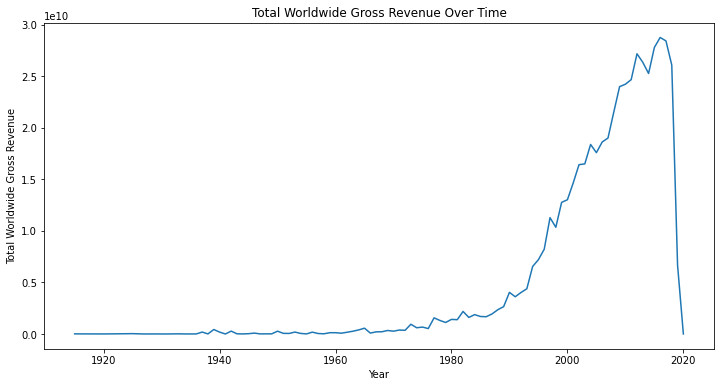

In [34]:
#Line graph
plt.figure(figsize=(12, 6))
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])
tn_df['year'] = tn_df['release_date'].dt.year
total_gross_by_year = tn_df.groupby('year')['worldwide_gross'].sum()
sns.lineplot(x=total_gross_by_year.index, y=total_gross_by_year.values)
plt.title('Total Worldwide Gross Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Total Worldwide Gross Revenue')
plt.show()

This visualization depicts the general trajectory of cumulative revenue across various release dates, capturing the ups and downs in earnings over time. Stakeholders can discern extended patterns in revenue generation and pinpoint periods of high productivity or stagnancy within the industry. It assists in strategic planning by illuminating past revenue trends, enabling stakeholders to anticipate future revenue projections and adapt their business strategies accordingly.

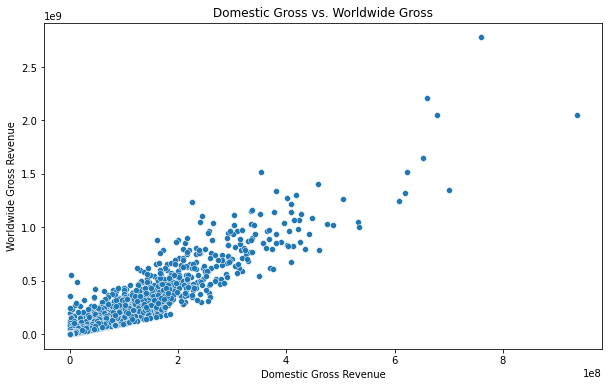

In [35]:
# Scatter Plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='domestic_gross', y='worldwide_gross', data=tn_df)
plt.title('Domestic Gross vs. Worldwide Gross')
plt.xlabel('Domestic Gross Revenue')
plt.ylabel('Worldwide Gross Revenue')
plt.show()

This scatter plot unveils the correlation between domestic and worldwide gross revenue for each movie, providing insights into how revenue is distributed and any potential connections between these factors. Stakeholders can evaluate the relative impact of domestic versus international markets on overall revenue. It aids in comprehending the global appeal of movies and informs decisions concerning international distribution strategies and market targeting.

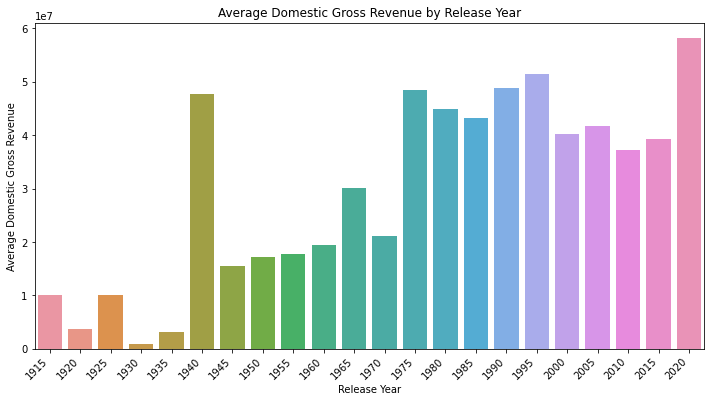

In [39]:
#bar graph
tn_df['year'] = pd.to_datetime(tn_df['year'], format='%Y')

# Grouping years into intervals of 5 years
average_domestic_gross_by_year = tn_df.groupby(pd.Grouper(key='year', freq='5Y'))['domestic_gross'].mean()

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=average_domestic_gross_by_year.index.year, y=average_domestic_gross_by_year.values)

plt.title('Average Domestic Gross Revenue by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Domestic Gross Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()

This visualization offers an understanding of how movies typically perform over the years by displaying the average domestic earnings for each year of release. Interested parties can examine these trends to grasp the general profitability and success rates of yearly movie releases. This analysis aids in pinpointing potential periods of industry growth or downturn, thereby assisting in strategic decisions regarding the timing and scheduling of movie releases.